# **The Sparks Foundation: Data Science and Business Analysis Tasks**

## **Task2:Prediction Using Unsupervised ML (Clustring)**

## **Author: Mohamed Ahmed Negm**

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [2]:
#load the dataset 
iris = load_iris()

In [8]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df.drop(['sepal length (cm)', 'sepal width (cm)'],axis='columns',inplace=True)
df.head(3)

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2


In [10]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

/home/mohamednegm/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mohamednegm/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mohamednegm/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mohamednegm/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

#### find the optimum number of clusters for K Means determine the value of K

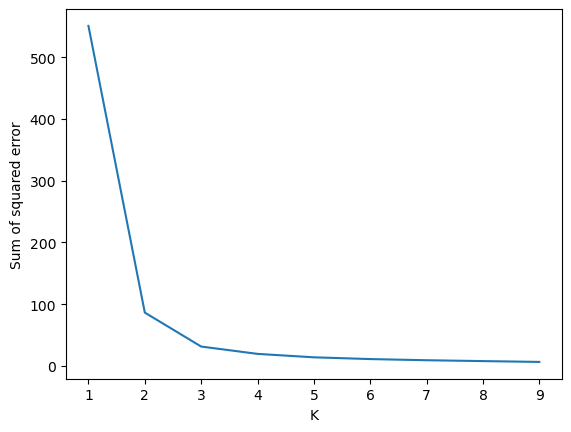

In [11]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [12]:
# So the optimum number of clusters is 3
km = KMeans(n_clusters=3)
yp = km.fit_predict(df)
yp

/home/mohamednegm/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [13]:
df['cluster'] = yp
df.head(2)

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1


In [14]:
df.cluster.unique()

array([1, 2, 0], dtype=int32)

In [15]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

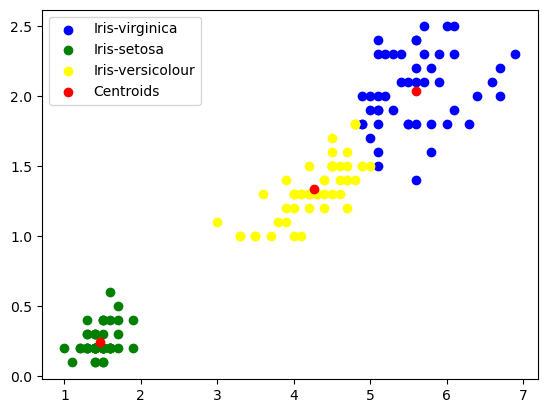

In [16]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue', label = 'Iris-virginica')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green',label = 'Iris-setosa')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow',label = 'Iris-versicolour')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], c = 'red', label = 'Centroids')
plt.legend()